# Example: Compare CZT to FFT

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np 
import matplotlib.pyplot as plt

sys.path.append('..')
import czt

# Optional
# https://github.com/garrettj403/SciencePlots
plt.style.use(['science', 'notebook'])

# Generate Time-Domain Signal for Example

In [3]:
# Time data
t = np.arange(0, 20e-3, 1e-4)
dt = t[1] - t[0]
Fs = 1 / dt
N = len(t)

print("Sampling period:    {:5.2f} ms".format(dt * 1e3))
print("Sampling frequency: {:5.2f} kHz".format(Fs / 1e3))
print("Nyquist frequency:  {:5.2f} kHz".format(Fs / 2 / 1e3))
print("Number of points:   {:5d}".format(N))

Sampling period:     0.10 ms
Sampling frequency: 10.00 kHz
Nyquist frequency:   5.00 kHz
Number of points:     200


In [4]:
# Signal data
def model1(t):
    """Exponentially decaying sine wave with higher-order distortion."""
    output = (1.0 * np.sin(2 * np.pi * 1e3 * t) + 
              0.3 * np.sin(2 * np.pi * 2.5e3 * t) + 
              0.1 * np.sin(2 * np.pi * 3.5e3 * t)) * np.exp(-1e3 * t)
    return output

def model2(t):
    """Exponentially decaying sine wave without higher-order distortion."""
    output = (1.0 * np.sin(2 * np.pi * 1e3 * t)) * np.exp(-1e3 * t)
    return output

sig = model1(t)

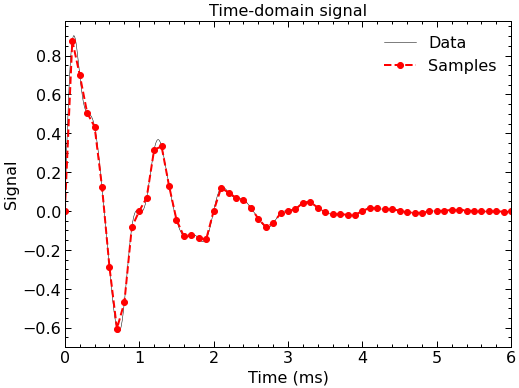

In [5]:
# Plot time-domain data
plt.figure()
t_tmp = np.linspace(0, 6, 601) / 1e3
plt.plot(t_tmp*1e3, model1(t_tmp), 'k', lw=0.5, label='Data')
plt.plot(t*1e3, sig, 'ro--', label='Samples')
plt.xlabel("Time (ms)")
plt.ylabel("Signal")
plt.xlim([0, 6])
plt.legend()
plt.title("Time-domain signal");

# Frequency-domain

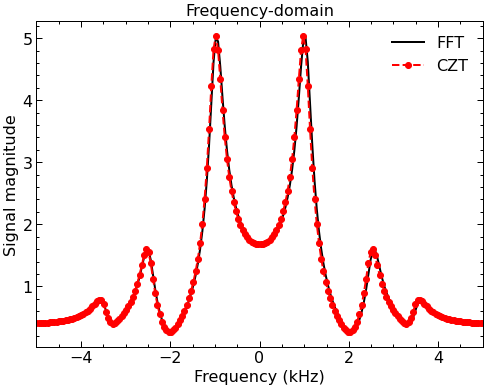

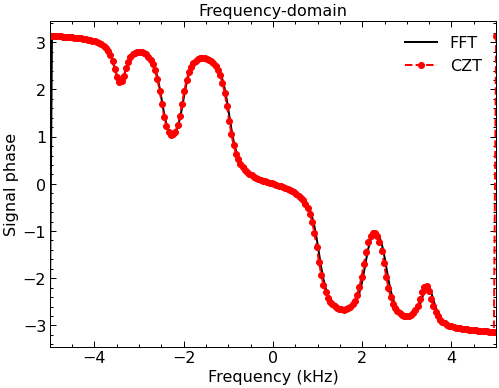

In [6]:
sig_fft = np.fft.fftshift(np.fft.fft(sig))
f_fft = np.linspace(-Fs / 2, Fs / 2, len(sig_fft))

freq, sig_f = czt.time2freq(t, sig)

plt.figure()
plt.plot(f_fft / 1e3, np.abs(sig_fft), 'k',    label='FFT')
plt.plot(freq / 1e3,  np.abs(sig_f),   'ro--', label='CZT')
plt.xlabel("Frequency (kHz)")
plt.ylabel("Signal magnitude")
plt.xlim([f_fft.min()/1e3, f_fft.max()/1e3])
plt.legend()
plt.title("Frequency-domain")
plt.savefig("results/freq-domain.png", dpi=600)

plt.figure()
plt.plot(f_fft / 1e3, np.angle(sig_fft), 'k',    label='FFT')
plt.plot(freq / 1e3,  np.angle(sig_f),   'ro--', label='CZT')
plt.xlabel("Frequency (kHz)")
plt.ylabel("Signal phase")
plt.xlim([f_fft.min()/1e3, f_fft.max()/1e3])
plt.legend()
plt.title("Frequency-domain");